
## Simple Comparison of PDPs and SHAP values

#### Khalid Alhajri, ka33473
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences

_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Elnara Rustamzade, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/elnara-rustamzade/)

### Executive Summary

This project provides a focused comparison between **Partial Dependence Plots (PDPs)** and **Shapely (SHAP) values** as tools for interpreting machine learning models in subsurface applications. Both methods aim to explain how input features influence model predictions, but they differ in their computational logic and interpretability scope.

We begin with a bivariate feature analysis and ranking an essential preprocessing step before applying model-based interpretation tools. Using statistical relationships and visual diagnostics, we highlight which features exhibit strong relationships with the target variable.

We then apply both PDPs and SHAP values to a trained Random Forest Regressor to evaluate feature importance and capture interaction effects. While PDPs provide an easy-to-understand, average view of feature impact, SHAP values offer more nuanced, local and global insights rooted in game theory. To address limitations of PDPs in capturing local heterogeneity, we also introduce Individual Conditional Expectation (ICE) plots, which help visualize variance across instances.

The study confirms that:
- PDPs are simple and efficient for global interpretation, especially in low-dimensional settings.
- SHAP values provide more detailed and robust explanations, particularly valuable in heterogeneous and high-dimensional datasets.
- Using both in tandem—PDPs for quick visualization and SHAP for deep insights—enhances the interpretability of complex models in geoscientific workflows.

Overall, this project demonstrates the importance of model explainability in machine learning, especially in high-stakes subsurface applications where decisions rely on transparent and interpretable predictions.


##  Introduction

Understanding how features influence model predictions is central to explainable machine learning. Among the most commonly used interpretability tools are **Partial Dependence Plots (PDPs)** and **SHAP (Shapley)** values. PDPs offer a global perspective by showing the average effect of a feature on a model’s prediction [Friedman, 2001]. In contrast, SHAP values—rooted in game theory assign credit to features by treating the prediction task as a cooperative game, where each feature is considered a "player" contributing to the overall outcome [Pyrcz, 2024].

The theoretical foundation of SHAP comes from Shapley values, a concept from cooperative game theory that ensures fair distribution of gains (or contributions) among players. This approach allows SHAP to provide both local and global explanations, offering insight into how much each feature contributes to a specific prediction and across the dataset as a whole.

Traditionally, PDPs and SHAP are used after building a predictive model. However, during early-stage feature exploration and ranking, visual and statistical tools can still reveal potential patterns and relationships—even in the absence of a trained model. This is emphasized in applied workflows like those presented by Pyrcz [2024], which use statistical measures (e.g., mutual information, correlation, partial dependence-like visualizations) to guide variable selection while addressing the curse of dimensionality.

While PDPs are intuitive and easy to interpret, they can obscure important interactions due to their reliance on averaging. To address this, **Goldstein et al. [2015]** introduced **Individual Conditional Expectation (ICE) plots**, which visualize the variation in predictions for each individual observation—highlighting heterogeneity and uncovering interactions that PDPs might hide.

In this project, we will explore how PDPs and SHAP values analysis can support feature understanding and selection even without a trained predictive model, using rank-based heuristics and data-driven exploration in high-dimensional spaces.



## Motivation

While PDPs and SHAP values offer distinct and powerful views into feature behavior, choosing between them or combining their strengths—requires a deeper understanding of their practical trade-offs. Each method approaches feature explanation differently: **PDPs** provide a global, averaged perspective that is computationally efficient and easy to interpret, while **SHAP values**, grounded in cooperative game theory, offer detailed local attributions and account for feature interactions more rigorously.

This difference in methodology gives rise to important questions:

- How well does each method capture feature interactions?
- What are the computational demands of each approach, especially as the number of features grows?
- How do these methods perform under the curse of dimensionality, where model interpretability, statistical coverage, and visualization become more challenging?
- What trade-offs arise between explanation accuracy, interpretability, and efficiency?

The **curse of dimensionality** is a core concern in high-dimensional data analysis. As the number of features increases:
- The feature space becomes sparse, making it difficult to sample reliably and train robust models.
- Interpretation tools like PDPs may become misleading, as they average over unrealistic combinations of feature values.
- The computational complexity of methods like SHAP scales poorly, especially with large feature sets.
- Visual diagnostics become more difficult, increasing the risk of overlooking key patterns or interactions.




## Project Approach

To address the key questions raised in the motivation—such as the ability to capture feature interactions, computational complexity, and the effects of curse of dimensionality, we will design a step-by-step approach grounded in practical, exploratory analysis.

Our workflow is structured in four main stages:



#### 1- Bivariate Analysis and Feature Ranking (No PDPs or SHAP)
We begin with a model-free, statistical exploration of the dataset to establish a baseline understanding:
- Perform **bivariate visualizations** (e.g., scatter plots, correlation matrices, mutual information).
- Apply **feature ranking techniques** such as correlation, rank correlation, partial and semipartial correlation.
- These tools help us to reveal potential nonlinearities, interactions, and redundant features before we compute SHAP or PDPs.

#### 2- Compute SHAP Values  
We train a simple predictive model (e.g., Random Forest or Gradient Boosted Trees) and compute:
- Local and global SHAP values to capture each feature’s contribution to individual and overall predictions.
- Examine SHAP plots (summary plots, dependence plots) to detect interactions and non-additive effects
- Evaluate computational cost and interpretability in high-dimensional settings.



#### 3- Compute and Construct PDPs
We then calculate:
- Partial Dependence Plots for the most relevant features and feature pairs.
- Use PDPs to explore average trends and compare to SHAP findings.
- Assess when PDPs fail to capture interactions.



#### 4- Compare Between PDPs and SHAP Values & Conclusion 
Finally, we synthesize our findings by comparing the two methods:
- Where do they agree or disagree on important features?
- When do SHAP values reveal interactions or effects that PDPs miss?
- How do their computational demands and interpretability scale with dimensionality?
- What practical recommendations can be drawn from this comparison for different modeling scenarios?



This structured approach allows us to compare theory with practice understand where each tool performs best, and provide practical insights for feature selection, ranking  and model interpretability even before training complex models.


## Load the Required Libraries & Packages

To begin our analysis and construct visualizations, we first load the essential Python libraries & packages. These libraries and packages support data manipulation, statistical analysis,  and model interpretation. We'll also load plotting libraries and packages for visual exploration and presentation of results.

In [1]:
# System & Environment
import os
import sys
import math
import random

# Core Libraries
import numpy as np
import pandas as pd

# Plotting & Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib.colors import ListedColormap
import seaborn as sns

# Statistical & Numerical Analysis
from scipy import stats
import numpy.linalg as linalg
import scipy.spatial as sp
import scipy.signal as signal
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.weightstats import DescrStatsW
from numba import jit

# Machine Learning
from sklearn import preprocessing, metrics
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay, partial_dependence


# SHAP values
import shap

# Geostatspy
import geostatspy
import geostatspy.GSLIB as GSLIB
import geostatspy.geostats as geostats


## Custom Colormap and Utility Functions

Since this project follows the applied workflows developed by **Pyrcz (2024)**, we will adopt several of his utilities to maintain consistency with his visual and statistical exploration style.

Specifically, we will:
- Implement a custom colormap inspired by his visual design, which enhances the interpretability of matrix plots and feature ranking results.
- Define a set of helper functions frequently used in his tutorials—such as correlation matrix plotting, mutual information ranking, and feature importance visualization.

In the next cell, we will implement the color map and utility functions accordingly.


In [2]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
import warnings
from matplotlib.colors import ListedColormap

# Suppress warnings if desired
ignore_warnings = True
if ignore_warnings:
    warnings.filterwarnings('ignore')

# Ensure gridlines are behind plot elements
plt.rc('axes', axisbelow=True)

# Base color map for plots
cmap = plt.cm.inferno

# --- Colormap for masking low correlations (significance-based) ---

# RdBu_r with white masked zone for weak correlations
my_colormap = plt.cm.get_cmap('RdBu_r', 256)
newcolors = my_colormap(np.linspace(0, 1, 256))
white = np.array([250/256, 250/256, 250/256, 1])
newcolors[76:180, :] = white  # mask abs(corr) < 0.4
signif = ListedColormap(newcolors)

# Inferno-based custom colormap with white masked low values
my_colormap = plt.cm.get_cmap('inferno', 256)
newcolors = my_colormap(np.linspace(0, 1, 256))
newcolors[0:12, :] = white  # mask very low values
sign1 = ListedColormap(newcolors)
def feature_rank_plot(pred,metric,mmin,mmax,nominal,title,ylabel,mask): # feature ranking plot
    mpred = len(pred); mask_low = nominal-mask*(nominal-mmin); mask_high = nominal+mask*(mmax-nominal)
    plt.plot(pred,metric,color='black',zorder=20)
    plt.scatter(pred,metric,marker='o',s=10,color='black',zorder=100)
    plt.plot([-0.5,m-1.5],[0.0,0.0],'r--',linewidth = 1.0,zorder=1)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric < nominal),interpolate=True,color='dodgerblue',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric > nominal),interpolate=True,color='lightcoral',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_low),metric,where=(metric < mask_low),interpolate=True,color='blue',alpha=0.8,zorder=10)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_high),metric,where=(metric > mask_high),interpolate=True,color='red',alpha=0.8,zorder=10)  
    plt.xlabel('Predictor Features'); plt.ylabel(ylabel); plt.title(title)
    plt.ylim(mmin,mmax); plt.xlim([-0.5,m-1.5]); add_grid();
    return

def plot_corr(corr_matrix,title,limits,mask):                 # plots a graphical correlation matrix 
    my_colormap = plt.cm.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white                # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns); ax = plt.gca()
    ax.xaxis.set_label_position('bottom'); ax.xaxis.tick_bottom()
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])

def partial_corr(C):                                          # partial correlation by Fabian Pedregosa-Izquierdo, f@bianp.net
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
    return P_corr

def semipartial_corr(C):                                      # Michael Pyrcz modified the function above by Fabian Pedregosa-Izquierdo, f@bianp.net for semipartial correlation

    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] 
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
    return P_corr

def mutual_matrix(df,features):                               # calculate mutual information matrix
    mutual = np.zeros([len(features),len(features)])
    for i, ifeature in enumerate(features):
        for j, jfeature in enumerate(features):
            if i != j:
                mutual[i,j] = mutual_info_regression(df.iloc[:,i].values.reshape(-1, 1),np.ravel(df.iloc[:,j].values))[0]
    mutual /= np.max(mutual) 
    for i, ifeature in enumerate(features):
        mutual[i,i] = 1.0
    return mutual

def mutual_information_objective(x,y):                        # modified from MRMR loss function, Ixy - average(Ixx)
    mutual_information_quotient = []
    for i, icol in enumerate(x.columns):
        Vx = mutual_info_regression(x.iloc[:,i].values.reshape(-1, 1),np.ravel(y.values.reshape(-1, 1)))
        Ixx_mat = []
        for m, mcol in enumerate(x.columns):
            if i != m:
                Ixx_mat.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(x.iloc[:,i].values.reshape(-1, 1))))
        Wx = np.average(Ixx_mat)
        mutual_information_quotient.append(Vx/Wx)
    mutual_information_quotient  = np.asarray(mutual_information_quotient).reshape(-1)
    return mutual_information_quotient

def delta_mutual_information_quotient(x,y):                   # standard mutual information quotient
    delta_mutual_information_quotient = []               
    
    Ixy = []
    for m, mcol in enumerate(x.columns):
        Ixy.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(y.values.reshape(-1, 1))))
    Vs = np.average(Ixy)
    Ixx = []
    for m, mcol in enumerate(x.columns):
        for n, ncol in enumerate(x.columns):
            Ixx.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(x.iloc[:,n].values.reshape(-1, 1))))
    Ws = np.average(Ixx) 
    
    for i, icol in enumerate(x.columns):          
        Ixy_s = []                                          
        for m, mcol in enumerate(x.columns):
            if m != i:
                Ixy_s.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(y.values.reshape(-1, 1))))
        Vs_s = np.average(Ixy_s)
        Ixx_s = []
        for m, mcol in enumerate(x.columns):
            if m != i:
                for n, ncol in enumerate(x.columns):
                    if n != i:
                        Ixx_s.append(mutual_info_regression(x.iloc[:,m].values.reshape(-1, 1),np.ravel(x.iloc[:,n].values.reshape(-1, 1))))                  
        Ws_s = np.average(Ixx_s)
        delta_mutual_information_quotient.append((Vs/Ws)-(Vs_s/Ws_s))
    
    delta_mutual_information_quotient  = np.asarray(delta_mutual_information_quotient).reshape(-1)  
    return delta_mutual_information_quotient

def weighted_avg_and_std(values, weights):                    # calculate weighted statistics (Eric O Lebigot, stack overflow)
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

def weighted_percentile(data, weights, perc):                 # calculate weighted percentile (iambr on StackOverflow @ https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy/32216049) 
    ix = np.argsort(data)
    data = data[ix] 
    weights = weights[ix] 
    cdf = (np.cumsum(weights) - 0.5 * weights) / np.sum(weights) 
    return np.interp(perc, cdf, data)

def histogram_bounds(values,weights,color):                   # add uncertainty bounds to a histogram          
    p10 = weighted_percentile(values,weights,0.1); avg = np.average(values,weights=weights); p90 = weighted_percentile(values,weights,0.9)
    plt.plot([p10,p10],[0.0,45],color = color,linestyle='dashed')
    plt.plot([avg,avg],[0.0,45],color = color)
    plt.plot([p90,p90],[0.0,45],color = color,linestyle='dashed')

def add_grid():                                               # add major and minor gridlines
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

## Load Dataset

The dataset used in this analysis is from: **Pyrcz (2021).** The data was loaded from the open GitHub repository accompanying this Zenodo release. We will work with the following features:

- **Porosity**: Fraction of void space in the rock, expressed as a percentage (%). It represents the storage capacity of the reservoir rock.
- **Permeability**: The ability of fluids to flow through the rock, measured in milliDarcies (mD). It controls how easily hydrocarbons can be produced.
- **Total Organic Content (TOC)**: A measure of the amount of organic carbon present in the rock, typically expressed as a percentage (%). TOC is a key indicator of a source rock's potential to generate hydrocarbons.
- **Acoustic Impedance**: The product of rock density and seismic velocity, expressed in units of $kg/m^2 \cdot s \times 10^3$. It is commonly derived from well logs or seismic inversion and used in lithology and fluid identification.
- **Brittleness Index**: A dimensionless measure (often unitless or given in %) indicating how easily the rock fractures under stress. High brittleness is favorable for hydraulic fracturing.
- **Vitrinite Reflectance (VR)**: A geochemical maturity indicator (usually in %Ro), representing the reflectivity of vitrinite particles in sedimentary rocks. It helps determine the thermal maturity and hydrocarbon generation potential of the source rock.

In [3]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv')

response = 'Prod'
x = df.copy(deep=True)
x = x.drop(['Well', response], axis='columns')
Y = df.loc[:, response]

features = x.columns.values.tolist() + [Y.name]
pred = x.columns.values.tolist()
resp = Y.name

xmin = [6.0, 0.0, 1.0, 10.0, 0.0, 0.9]
xmax = [24.0, 10.0, 5.0, 85.0, 2.2, 2.9]
Ymin = 500.0
Ymax = 9000.0

predlabel = ['Porosity (%)', 'Permeability (mD)', 'Acoustic Impedance (kg/m2s*10^6)',
             'Brittleness Ratio (%)', 'Total Organic Carbon (%)', 'Vitrinite Reflectance (%)']
resplabel = 'Normalized Initial Production (MCFPD)'

predtitle = ['Porosity', 'Permeability', 'Acoustic Impedance', 'Brittleness Ratio',
             'Total Organic Carbon', 'Vitrinite Reflectance']
resptitle = 'Normalized Initial Production'

featurelabel = predlabel + [resplabel]
featuretitle = predtitle + [resptitle]

m = len(pred) + 1
mpred = len(pred)


## Summary Statistics, Coverage, and Truncation

Before performing feature ranking or interpretation, it is essential to assess the distributional properties of the predictor and response variables. In this section, we compute key summary statistics (mean, standard deviation, percentiles). We also evaluate coverage ensuring that the sampled data sufficiently spans the expected feature ranges. Where necessary, we apply truncation to remove extreme outliers promoting more stable visualizations and interpretations in subsequent analyses.

### Tabular Summary Statistics

In [4]:
df.describe().transpose()    

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.990450,0.481588,-0.190000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,3864.407081,1553.277558,839.822063,2686.227611,3604.303506,4752.637555,8590.384044


All features have the same number of data points as the response feature **`Prod`**, which indicates **good coverage** across the dataset.
However, the **`Total Organic Carbon (TOC)`** feature contains some **negative values**, which are not physically meaningful. To ensure the quality of the analysis, we will apply **truncation** to remove these invalid values before continuing and equal them to **zero**.


In [5]:
df['TOC'] = np.where(df['TOC']<0.0, 0.0, df['TOC'])  
df.describe().transpose()    

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.991950,0.478264,0.000000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,3864.407081,1553.277558,839.822063,2686.227611,3604.303506,4752.637555,8590.384044


After reviewing the summary statistics and visualizing of the tabular summary statistics of the data, everything looks good and consistent. We can now proceed to the **Bivariate Analysis and Feature Ranking** to explore relationships between features and the responses and have an intial feature ranking.

## 1- Bivariate Analysis and Feature Ranking (No PDPs or SHAP)

We start with a simple, model-free analysis to understand how each feature relates to the response. This includes visual tools like scatter plots and correlation matrices, as well as basic feature ranking techniques based on Pyrcz (2024):

- **Bivariate Distributions** – Plots like scatter plots to explore how two features relate visually.
- **Covariance and Correlation Coefficients**: Assessing linear relationships between features and the response.
- **Spearman Rank Correlation**: Evaluating monotonic relationships to capture non-linear associations by removing the affects of the outlires.
- **Partial Correlation Coefficient**: Measuring the direct relationship between a feature and the response while controlling for all other features.
- **Semipartial Correlation Coefficient**: Assessing the unique contribution of a feature to the response, while controlling only for its effect on other predictors.
- **Beta Coefficient**: Measuring the standardized impact of each feature in linear regression.
- **Mutual Information**: Quantifying the amount of shared information between features and the target without assuming linearity.

These methods help reveal patterns, feature importance, and possible redundancy before using more advanced tools like SHAP values and PDPs.

### Bivariate Distributions

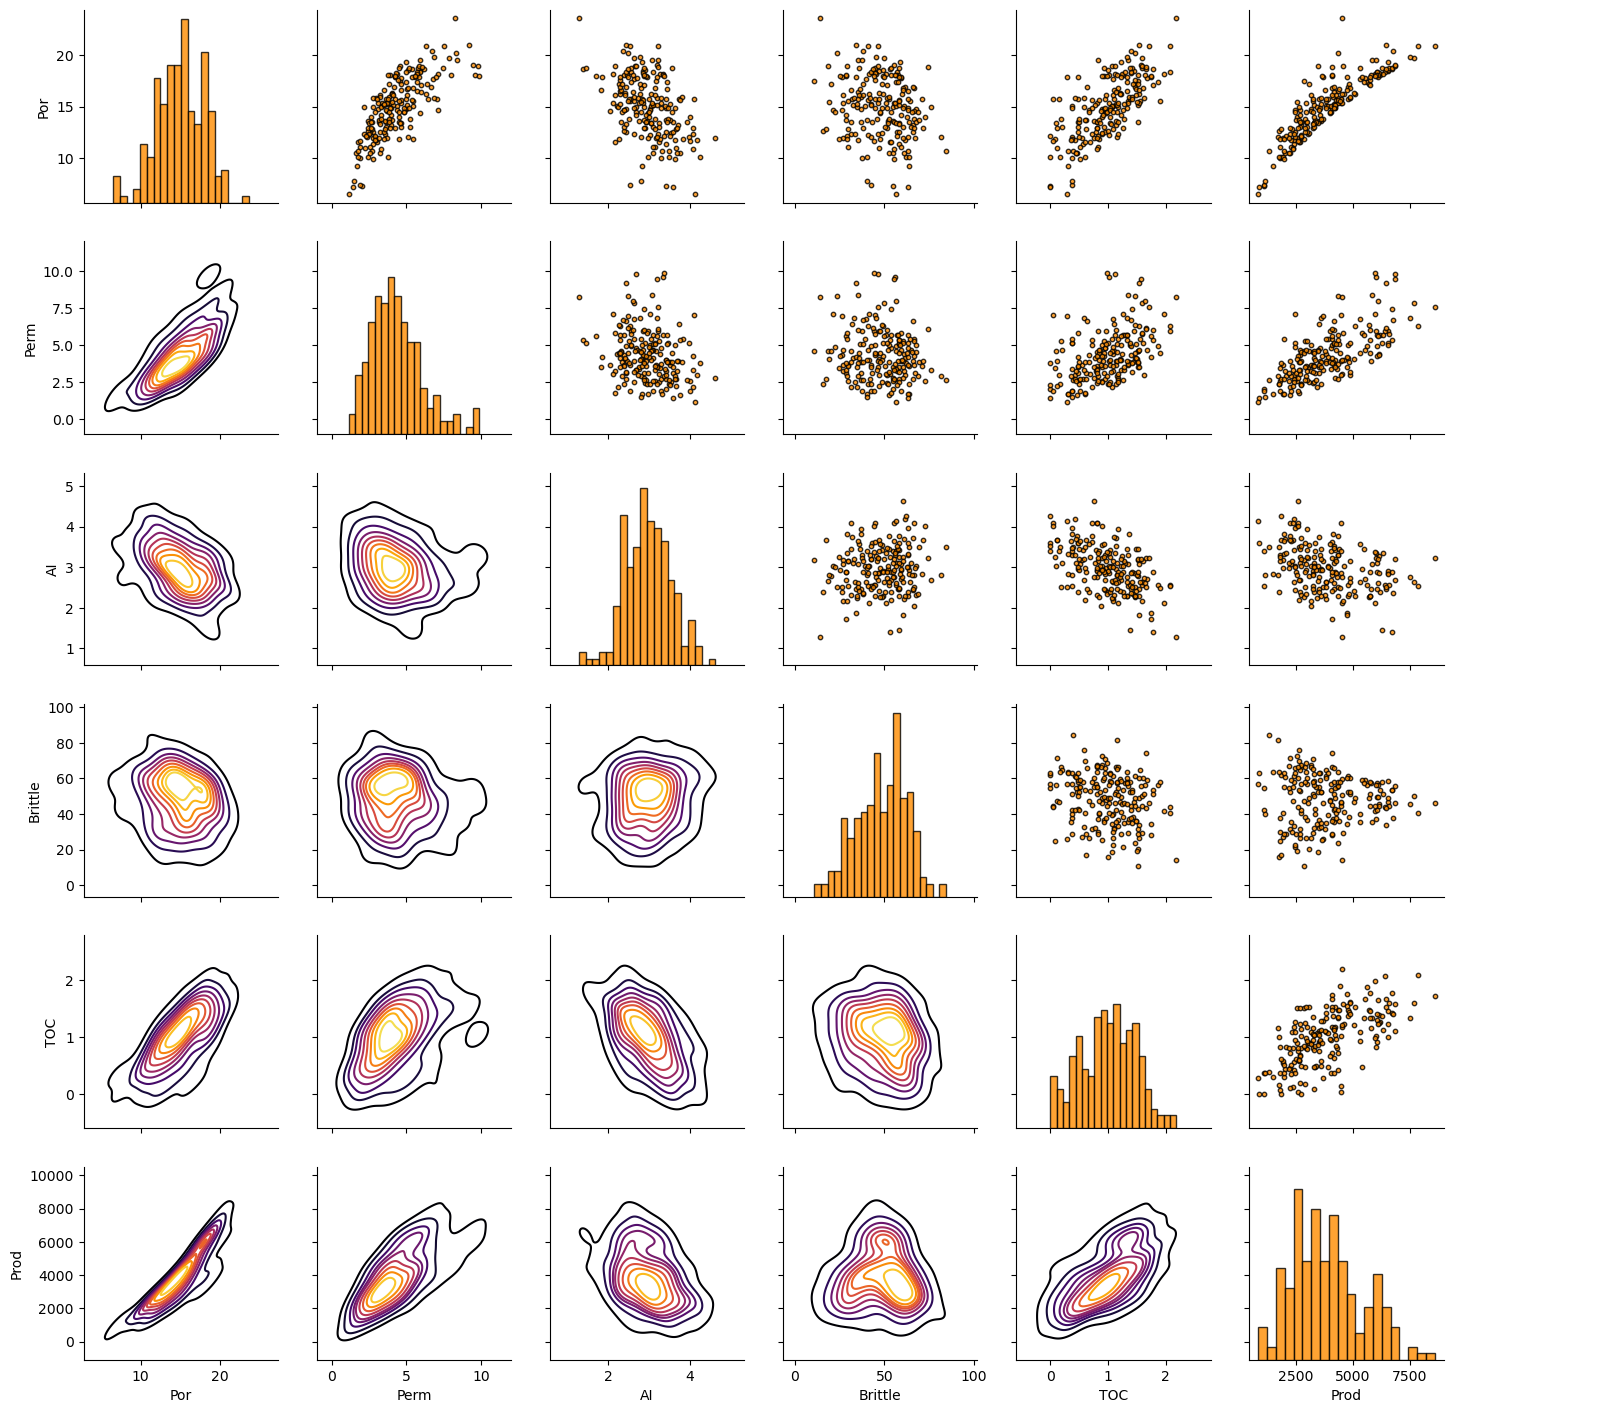

In [6]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
pairgrid = sns.PairGrid(df, vars=['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'Prod'])
pairgrid = pairgrid.map_upper(plt.scatter, color='darkorange', edgecolor='black', alpha=0.8, s=10)
pairgrid = pairgrid.map_diag(plt.hist, bins=20, color='darkorange', alpha=0.8, edgecolor='k')
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap=plt.cm.inferno, shade=False, shade_lowest=False, alpha=1.0, n_levels=10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
plt.show()


From the bivariate plots, there appears to be a possible **monotonic relationship** between **Porosity and TOC**, as well as between **Porosity and Permeability**. These trends suggest that as porosity increases, both TOC and permeability tend to change in a consistent direction, which needed to be considered during feature ranking. We will compare shortly this conclusion with other feature ranking techniques if they could capture it. Moreovre, we will compare SHAP values and PDPs performance in feature ranking on features has **monotonic relationship or linear relationship**. 

### Covariance and Correlation Coefficients

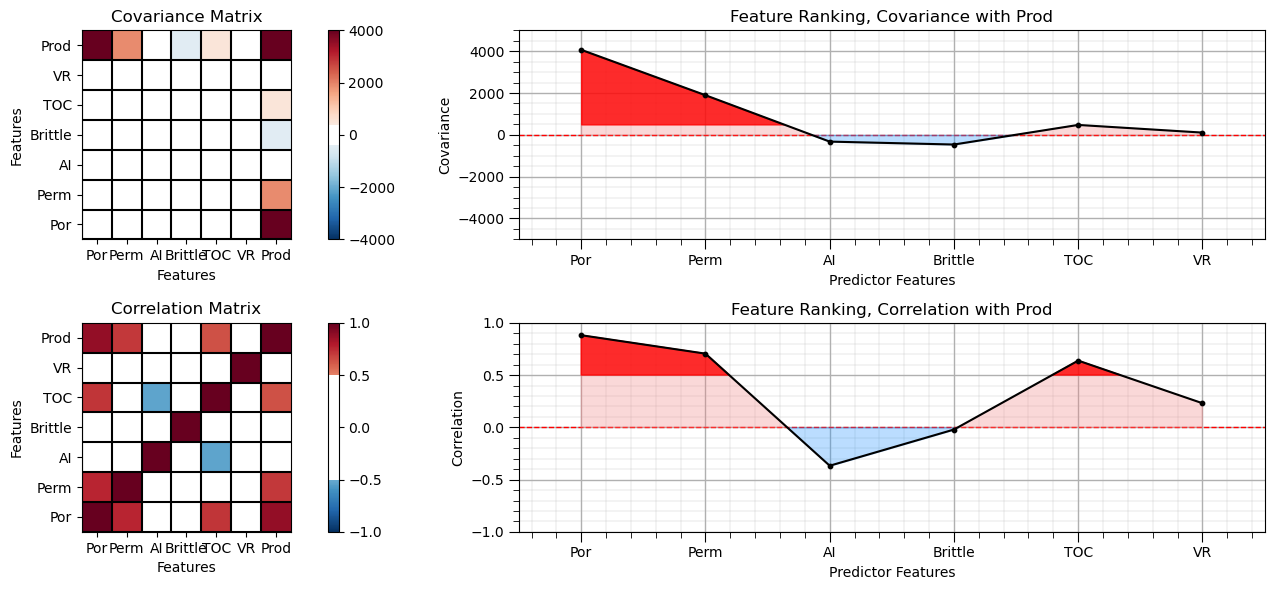

In [7]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138

cov_matrix = df.iloc[:, 1:8].cov()
covariance = cov_matrix.iloc[6, :6]
corr_matrix = df.iloc[:, 1:8].corr()
correlation = corr_matrix.iloc[6, :6]

plt.figure(figsize=(16, 6))

plt.subplot(2, 2, 1)
plot_corr(cov_matrix, 'Covariance Matrix', 4000.0, 0.1)
plt.xlabel('Features')
plt.ylabel('Features')

plt.subplot(2, 2, 2)
feature_rank_plot(pred, covariance, -5000.0, 5000.0, 0.0, 'Feature Ranking, Covariance with ' + resp, 'Covariance', 0.1)

plt.subplot(2, 2, 3)
plot_corr(corr_matrix, 'Correlation Matrix', 1.0, 0.5)
plt.xlabel('Features')
plt.ylabel('Features')

plt.subplot(2, 2, 4)
feature_rank_plot(pred, correlation, -1.0, 1.0, 0.0, 'Feature Ranking, Correlation with ' + resp, 'Correlation', 0.5)

plt.tight_layout()
plt.show()


- Covariance values depend on the units of each feature, so they can be **hard to compare**.
- For example, porosity in fraction vs. percentage gives completely different covariance values.
- That's why correlation is better it standardizes the relationships and removes unit effects.
- Since we have both covariance and correlation plots, it's easy to see how this issue shows up.
- The correlation plot gives us a **clearer, fairer comparison** across features.
- **Porosity**, **permeability**, and **TOC** show the **strongest positive relationships** with production.
- **Acoustic impedance** has a **weak negative correlation** with production.
- **Brittleness** is very close to **zero correlation**, but the bivariate scatterplots shows a non-linear pattern, there may be a sweet spot where brittleness is just right for high production.

Looking at the full correlation matrix:
- There’s a **strong correlation** between **porosity and permeability**, and between **porosity and TOC**. This was suggested as well by bivariate scatterplot.
- There’s also a **strong negative correlation** between **TOC and acoustic impedance**.
These patterns help us spot **redundant or interacting features**, which is useful before for our analyses.

### Spearman Rank Correlation

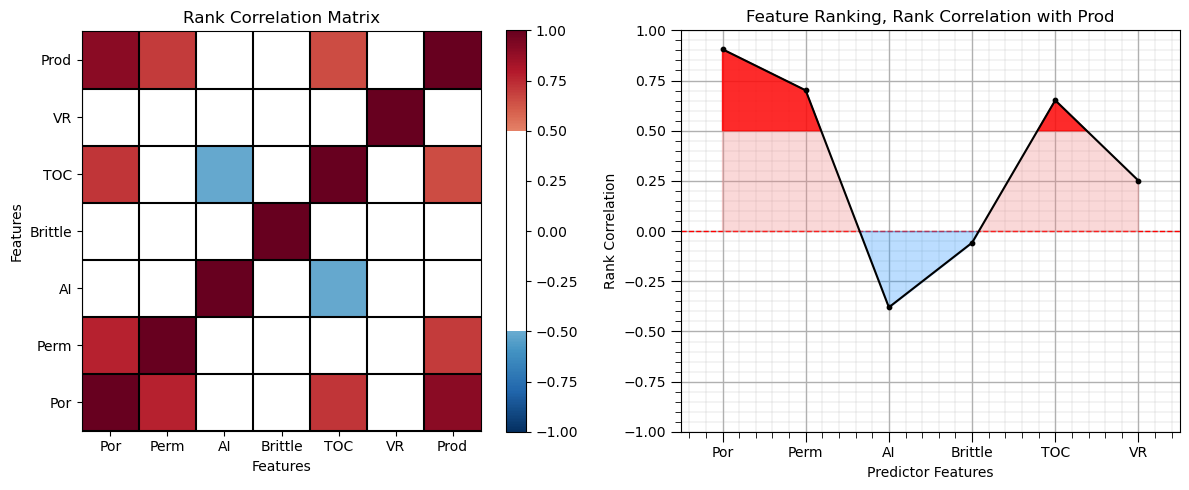

In [8]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
rank_correlation, rank_correlation_pval = stats.spearmanr(df.iloc[:, 1:8])
rank_matrix = pd.DataFrame(rank_correlation, columns=corr_matrix.columns)
rank_correlation = rank_correlation[:, 6][:6]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_corr(rank_matrix, 'Rank Correlation Matrix', 1.0, 0.5)
plt.xlabel('Features')
plt.ylabel('Features')

plt.subplot(1, 2, 2)
feature_rank_plot(pred, rank_correlation, -1.0, 1.0, 0.0, 'Feature Ranking, Rank Correlation with ' + resp, 'Rank Correlation', 0.5)

plt.tight_layout()
plt.show()



The matrix and line plots show that the rank correlation and regular correlation are very similar. This suggests that **nonlinear patterns or outliers** are **not strongly affecting** the correlation-based feature ranking.


### Partial Correlation Coefficient

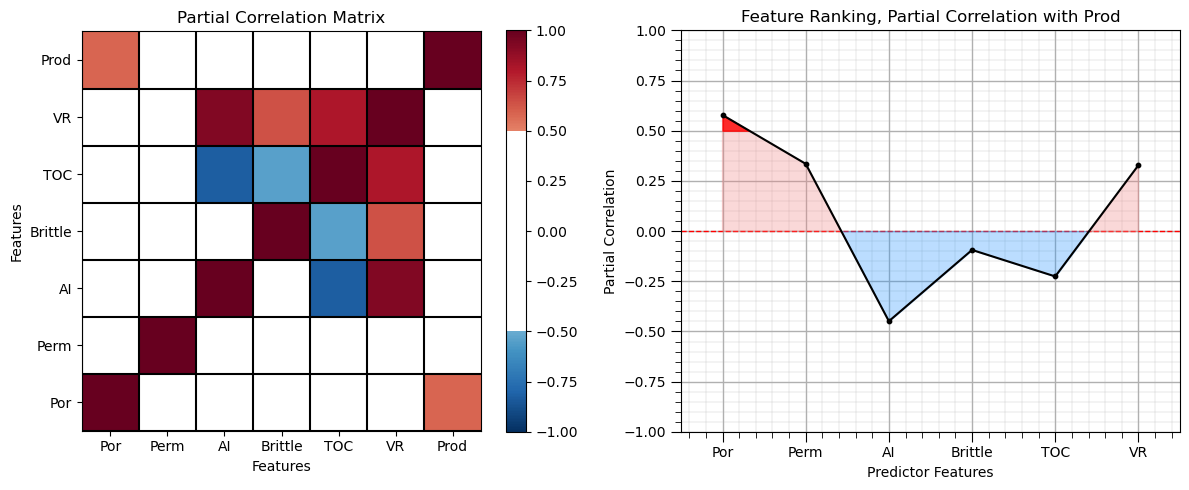

In [9]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
partial_correlation = partial_corr(df.iloc[:, 1:8])
partial_matrix = pd.DataFrame(partial_correlation, columns=corr_matrix.columns)
partial_correlation = partial_correlation[:, 6][:6]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_corr(partial_matrix, 'Partial Correlation Matrix', 1.0, 0.5)
plt.xlabel('Features')
plt.ylabel('Features')

plt.subplot(1, 2, 2)
feature_rank_plot(pred, partial_correlation, -1.0, 1.0, 0.0, 'Feature Ranking, Partial Correlation with ' + resp, 'Partial Correlation', 0.5)

plt.tight_layout()
plt.show()

Partial correlation shows how each feature relates to production **after removing the effect of all other features**,both from the predictor and the response. This helps reveal the unique contribution of each feature. From the results, we observe:
- **Porosity and permeability** are strongly related to each other, as shown above in multiple occusions, so their correlation with production is penalized when controlling for other features.
- The absolute correlations of **acoustic impedance** and **bitrinite** decrease more in the nigative side, showing that they provide unique information not captured by the other features.
- **TOC** flips signs, it appears positively related to production in simple correlation, but when we control for other features, it shows a negative relationship with production.


### Semipartial Correlation Coefficient

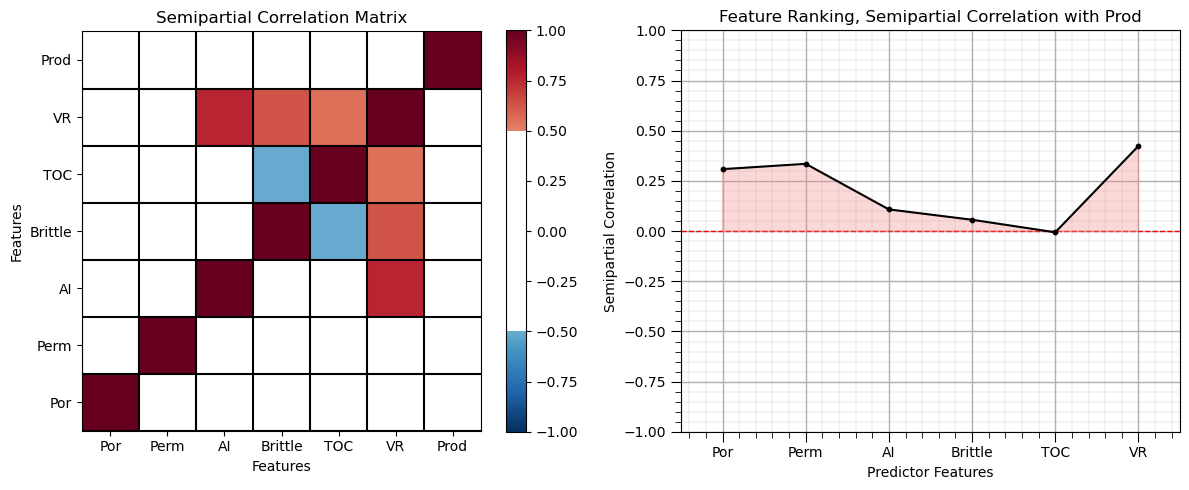

In [10]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
semipartial_correlation = semipartial_corr(df.iloc[:, 1:8])
semipartial_matrix = pd.DataFrame(semipartial_correlation, columns=corr_matrix.columns)
semipartial_correlation = semipartial_correlation[:, 6][:6]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_corr(semipartial_matrix, 'Semipartial Correlation Matrix', 1.0, 0.5)
plt.xlabel('Features')
plt.ylabel('Features')

plt.subplot(1, 2, 2)
feature_rank_plot(pred, semipartial_correlation, -1.0, 1.0, 0.0, 'Feature Ranking, Semipartial Correlation with ' + resp, 'Semipartial Correlation', 0.5)

plt.tight_layout()
plt.show()


Semipartial correlation measures the unique effect of each feature on the response (**`Prod`**) after removing the influence of other features from the predictor only.

From the results, we see that all features show some level of correlation with Prod except for **TOC**, which appears to have little to no direct relationship with Prod when controlling for the other predictors.


### Beta Coefficient

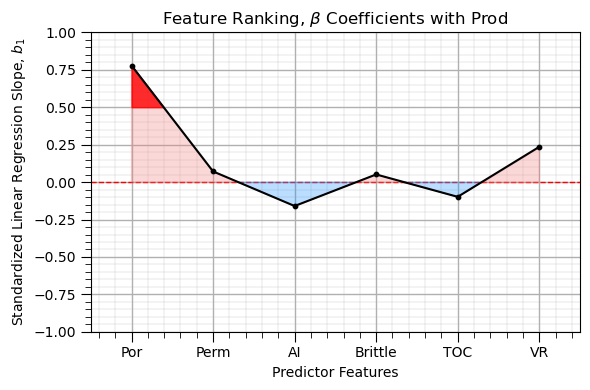

In [11]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
# 1st we need to standrize all features 
dfS = pd.DataFrame()                                          # Gaussian transform, standardization to a mean of 0 and variance of 1 
dfS['Well'] = df['Well'].values
dfS['Por'],d1,d2 = geostats.nscore(df,'Por')
dfS['Perm'],d1,d2 = geostats.nscore(df,'Perm')
dfS['AI'],d1,d2 = geostats.nscore(df,'AI')
dfS['Brittle'],d1,d2 = geostats.nscore(df,'Brittle')
dfS['TOC'],d1,d2 = geostats.nscore(df,'TOC')
dfS['VR'],d1,d2 = geostats.nscore(df,'VR')
dfS['Prod'],d1,d2 = geostats.nscore(df,'Prod')

# 2nd we need to construct linear regrission model
reg = LinearRegression()
reg.fit(dfS[pred], dfS[resp])
beta = reg.coef_

plt.figure(figsize=(6, 4))
plt.subplot(1, 1, 1)
feature_rank_plot(
    pred,
    beta,
    -1.0,
    1.0,
    0.0,
    r'Feature Ranking, $\beta$ Coefficients with ' + resp,
    r'Standardized Linear Regression Slope, $b_1$',
    0.5
)
plt.tight_layout()
plt.show()

Beta coefficients show how much each standardized feature affects the prediction of production (`Prod`) in a linear regression model. A higher absolute value means a stronger impact, while the sign (positive or negative) shows the direction of the relationship. From the results:

- Porosity has the highest beta coefficient, suggesting it is the most influential feature for predicting production. Higher porosity is linked to higher production.
- Vitrinite Reflectance (VR) has a positive beta coefficient indicating it contributes positively to production.
- Permeability and Brittleness have very small beta coefficients suggesting they have a weak or minimal direct effect on production in this linear model.
- TOC  and Acoustic Impedance (AI have small negative beta coefficients which may suggest a slight inverse relationship with production.


### Mutual Information

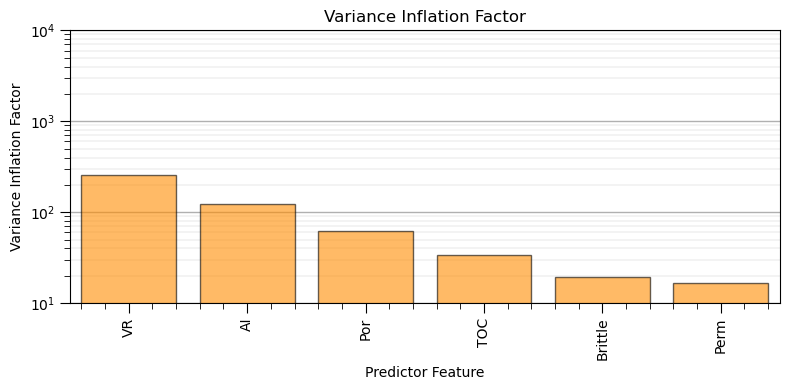

In [12]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
vif_values = []
for i in range(x.shape[1]):
    vif_values.append(variance_inflation_factor(x.values, i))

vif_values = np.asarray(vif_values)
indices = np.argsort(vif_values)[::-1]

plt.figure(figsize=(8, 4))
plt.subplot(1, 1, 1)
plt.title("Variance Inflation Factor")
plt.bar(range(x.shape[1]), vif_values[indices], edgecolor='black', color="darkorange", alpha=0.6, align="center")
plt.xticks(range(x.shape[1]), x.columns[indices], rotation=90)

plt.gca().yaxis.grid(True, which='major', linewidth=1.0)
plt.gca().yaxis.grid(True, which='minor', linewidth=0.2)
plt.gca().tick_params(which='major', length=7)
plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())

plt.xlim([-0.5, x.shape[1] - 0.5])
plt.yscale('log')
plt.ylim([1.0e1, 1.0e4])
plt.xlabel('Predictor Feature')
plt.ylabel('Variance Inflation Factor')
plt.tight_layout()
plt.show()


Mutual information measures how much knowing one feature helps predict the response. It captures any type of relationship **(linear or non-linear')**, making it more flexible than correlation. From the results:

- VR has a high Variance Inflation Factor (VIF, suggesting it shares a lot of information with other predictor features and may be redundant.
- Permeability on the other hand, has a **low VIF**, indicating it is less correlated with other predictors and provides more unique information to the model.

On the other hand, VIF measures how much a predictor is correlated with other predictors—**not** how it relates to the response. It’s often used to screen for redundancy and remove features that are too similar to others, helping to reduce multicollinearity in the model.


### Conclusion 


Based on the full set of analyses—correlation, mutual information, beta coefficients, and multicollinearity—we can conclude the following:

- The **most important predictor features** for **`Prod`** are:
  - Porosity
  - Permeability
  - Total Organic Carbon

- The **least important features**, in order from least to more impactful, are:
  - Vitrinite Reflectance
  - Acoustic Impedance
  - Brittleness

- There is clear evidence of **linear correlation** between:
  - **Porosity and Permeability**
  - **Porosity and TOC**
  - A **negative correlation** between **TOC and Acoustic Impedance**

In the next step, we will investigate how **SHAP values** and **PDPs** may align with or differ from these conclusions. This will help us validate or refine our understanding of feature importance using model-based interpretability methods.


## 2- Compute SHAP Values

**SHAP values** is a powerful, model-agnostic method for interpreting machine learning models. It is built on a concept from cooperative game theory, which ensures a fair and consistent distribution of a prediction’s value across all input features.

As described by Pyrcz (2024), *"SHAP is a model-agnostic approach that works by computing the impact of each feature on a prediction based on all possible combinations of features".

- **Global interpretation**: SHAP shows the average impact of each feature across all predictions, helping us understand overall feature importance.
- **Local interpretation**: SHAP breaks down individual predictions to show how each feature contributes to that specific result.
- **Feature ranking**: Features can be ranked by their average absolute SHAP value, offering a consistent and model-aware importance ranking Pyrcz (2024).
- **Multicollinearity**: SHAP helps deal with feature redundancy by distributing importance fairly among correlated features, unlike basic correlation or regression-based methods.

Because of its solid foundation in game theory and its ability to explain both individual and overall model behavior, SHAP is widely used for model interpretability and feature selection.


### Global SHAP values Plots 

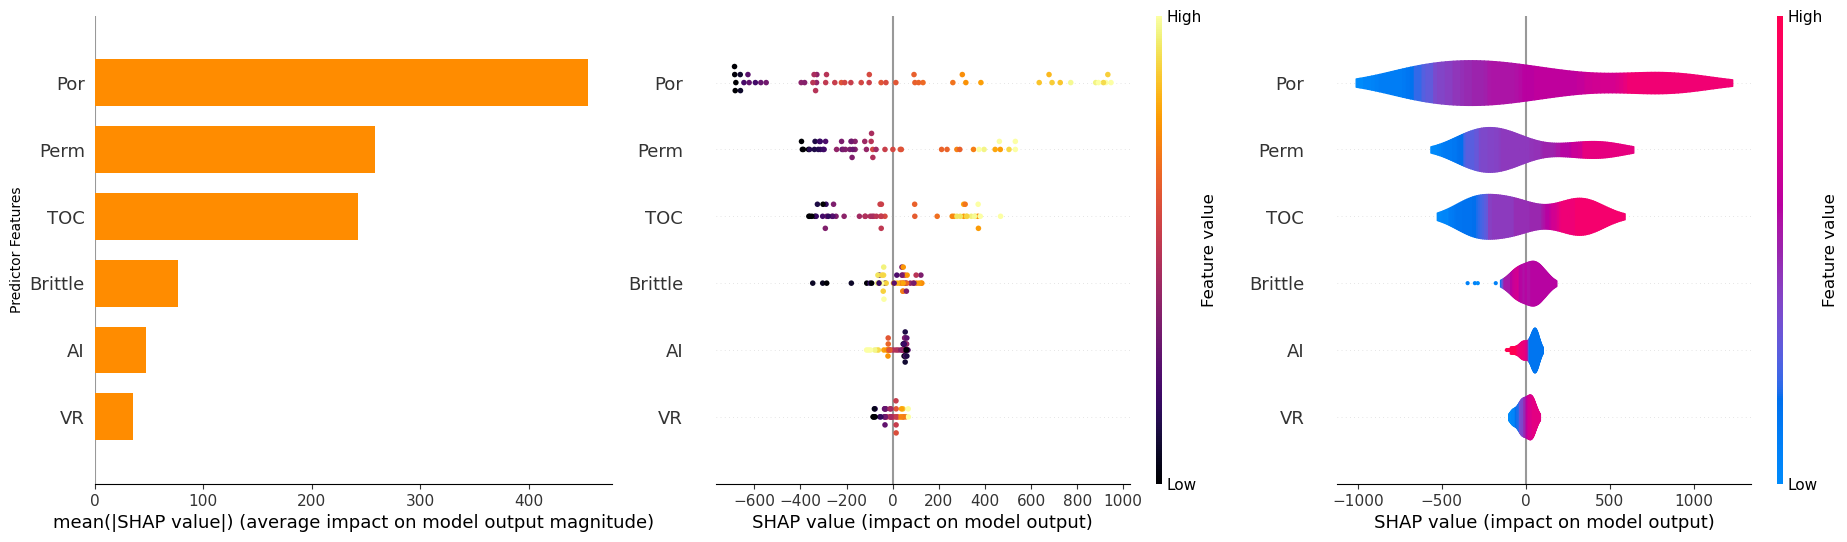

In [13]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
# since it is model based we need 1st build a model which a random forest model 
seed = 73073
max_leaf_nodes = 5
num_tree = 300
max_features = 2

rfr = RandomForestRegressor(
    max_leaf_nodes=max_leaf_nodes,
    random_state=seed,
    n_estimators=num_tree,
    max_features=max_features
)
rfr.fit(X=x, y=Y)

Y_hat = rfr.predict(x)
MSE = metrics.mean_squared_error(Y, Y_hat)
Var_Explained = metrics.explained_variance_score(Y, Y_hat)

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1].tolist()

# For simplicity, random data were selected:
background = shap.sample(x, nsamples=50, random_state=seed)
model_explainer = shap.TreeExplainer(rfr)
shap_values = model_explainer.shap_values(background)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
shap.summary_plot(
    shap_values,
    background,
    feature_names=pred,
    plot_type="bar",
    show=False,
    color="darkorange",
    cmap=plt.cm.inferno
)
plt.ylabel('Predictor Features')

plt.subplot(1, 3, 2)
shap.summary_plot(
    shap_values,
    background,
    feature_names=pred,
    show=False,
    cmap=plt.cm.inferno
)

plt.subplot(1, 3, 3)
shap.summary_plot(
    shap_values,
    background,
    feature_names=pred,
    plot_type="violin",
    show=False
)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()


The global SHAP value plots provided results that were consistent with our earlier feature ranking analyses Key features identified, such as Porosity, Permeability, and TOC—were also ranked highly by SHAP, reinforcing their importance in predicting production.

SHAP plots were:
- Easy to interpret, offering both bar and violin visualizations,
- Visually intuitive, making it straightforward to compare feature impacts, and
- Scalable to high dimensional data, handling many features without losing clarity.

Overall, SHAP proved to be a reliable and user-friendly tool for understanding both global feature importance.


### Local SHAP values Plots

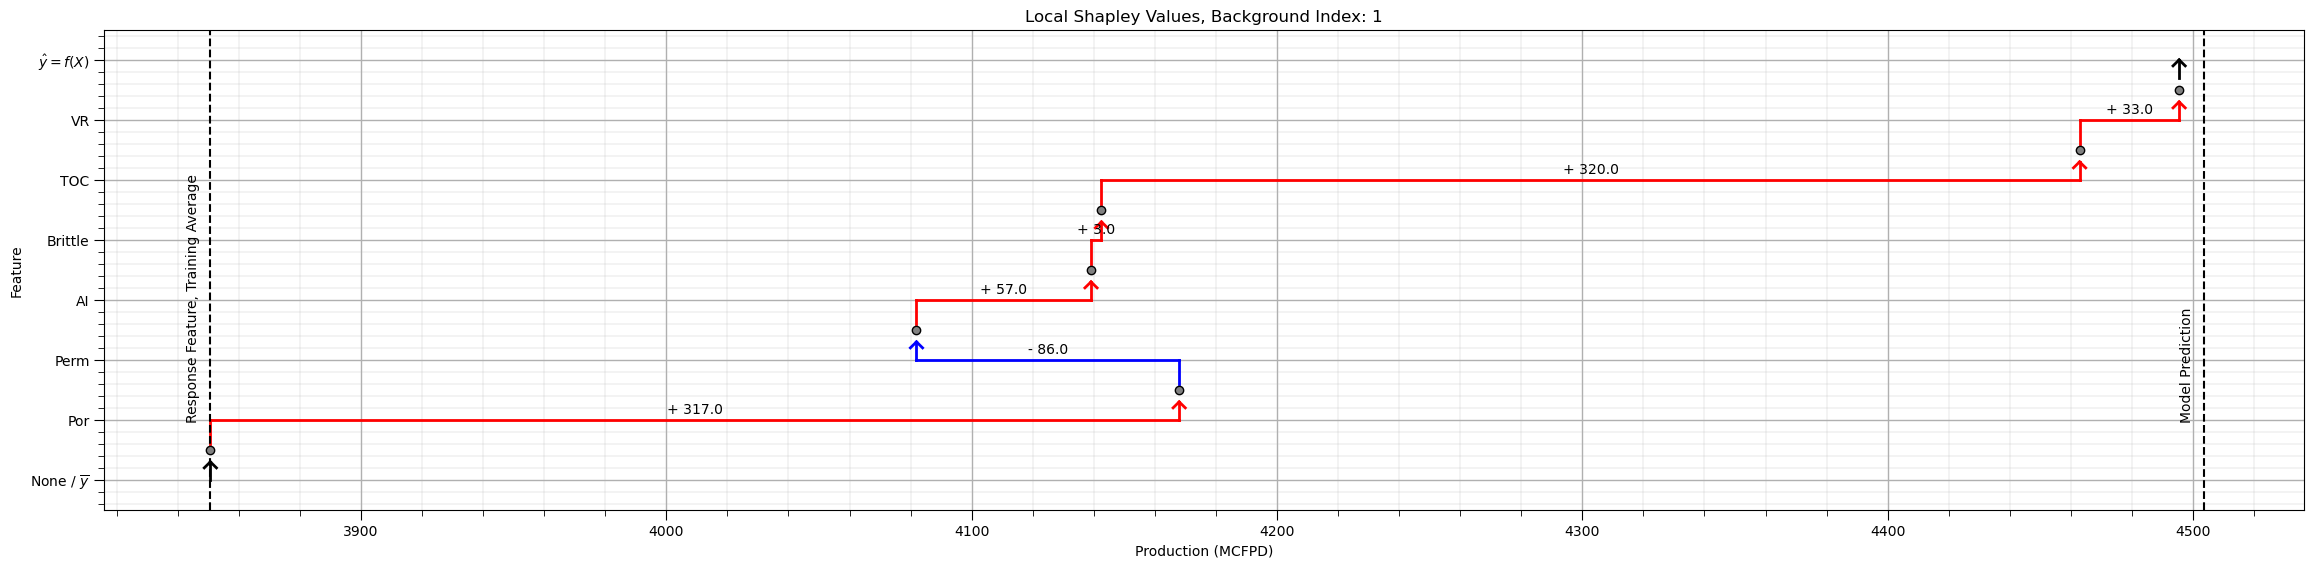

In [14]:
# Adapted from Pyrcz (2024) - Applied Machine Learning in Python
# Source: https://doi.org/10.5281/zenodo.15169138
nback = 1 # for data point number 1 

resp_avg = np.average(Y_hat)
yhat = rfr.predict(background.iloc[[nback]])
current = resp_avg

plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)

plt.plot([current, current], [0, 0.3], color='black', lw=2, zorder=1)
plt.plot([current - 2, current], [0.2, 0.3], color='black', lw=2, zorder=1)
plt.plot([current, current + 2], [0.3, 0.2], color='black', lw=2, zorder=1)

for i in range(len(pred) + 1):
    plt.scatter(current, i + 0.5, color='grey', edgecolor='black', zorder=10)
    if i < len(pred):
        color = 'red' if shap_values[nback, i] > 0.0 else 'blue'
        plt.plot([current, current + shap_values[nback, i]], [i + 1, i + 1], color=color, lw=2, zorder=1)
        plt.plot([current, current], [i + 0.6, i + 1], color=color, lw=2, zorder=1)
        plt.plot([current + shap_values[nback, i], current + shap_values[nback, i]], [i + 1, i + 1.3], color=color, lw=2, zorder=1)
        plt.plot([current + shap_values[nback, i] - 2, current + shap_values[nback, i]], [i + 1.2, i + 1.3], color=color, lw=2, zorder=1)
        plt.plot([current + shap_values[nback, i], current + shap_values[nback, i] + 2], [i + 1.3, i + 1.2], color=color, lw=2, zorder=1)
        label = '+ ' + str(np.round(shap_values[nback, i], 0)) if shap_values[nback, i] > 0.0 else '- ' + str(np.round(abs(shap_values[nback, i]), 0))
        plt.annotate(label, [current + shap_values[nback, i] * 0.5, i + 1.1], ha='center')
        current += shap_values[nback, i]

plt.plot([current, current], [i + 0.7, i + 1], color='black', lw=2, zorder=1)
plt.plot([current - 2, current], [i + 0.9, i + 1], color='black', lw=2, zorder=1)
plt.plot([current, current + 2], [i + 1, i + 0.9], color='black', lw=2, zorder=1)

plt.plot([resp_avg, resp_avg], [-0.5, len(pred) + 1.5], color='black', ls='--', zorder=1)
plt.plot([yhat, yhat], [-0.5, len(pred) + 1.5], color='black', ls='--', zorder=1)

plt.annotate('Response Feature, Training Average', [resp_avg - 8, 1.0], rotation=90.0)
plt.annotate('Model Prediction', [yhat - 8, 1.0], rotation=90.0)

plt.yticks(ticks=np.arange(len(pred) + 2), labels=[r'None / $\overline{y}$'] + pred + [r'$\hat{y}=f(X)$'])
add_grid()
plt.ylim([-0.5, len(pred) + 1.5])
plt.xlabel('Production (MCFPD)')
plt.ylabel('Feature')
plt.title('Local Shapley Values, Background Index: ' + str(nback))
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.8, wspace=0.2, hspace=0.2)
plt.show()


Local SHAP values offer an intuitive way to understand how each predictor feature contributes to a single prediction This method is especially useful for examining individual cases in detail.

As shown above for the selected data point (index 1), we can clearly see the direction and magnitude of each feature’s impact on the model’s predicted production value. In that example:

- All features had a positive contribution to the prediction.
- Except for **Permeability**, which had a negative contribution.

This type of interpretation makes SHAP a powerful tool not only for global feature importance but also for explaining why the model made a specific prediction at the local level.


### SHAP values Computational Challenges


While SHAP values provide clear and interpretable insights into model behavior, they can be **computationally intensive**—especially when dealing with a large number of features. This is because SHAP relies on calculating the marginal contribution of each feature across all possible feature combinations, which quickly becomes impractical as dimensionality increases. 

As Pyrcz (2024) explains, calculating Shapley values requires generating predictions from many different model combinations in order to estimate each feature’s unique contribution, making the process computationally demanding.

To address this, SHAP implementations often use sampling techniques (e.g., selecting a subset of background samples) to approximate values more efficiently, striking a balance between interpretability and performance, as mentioned by Pyrcz (2024) .


## 3- Compute and Construct PDPs

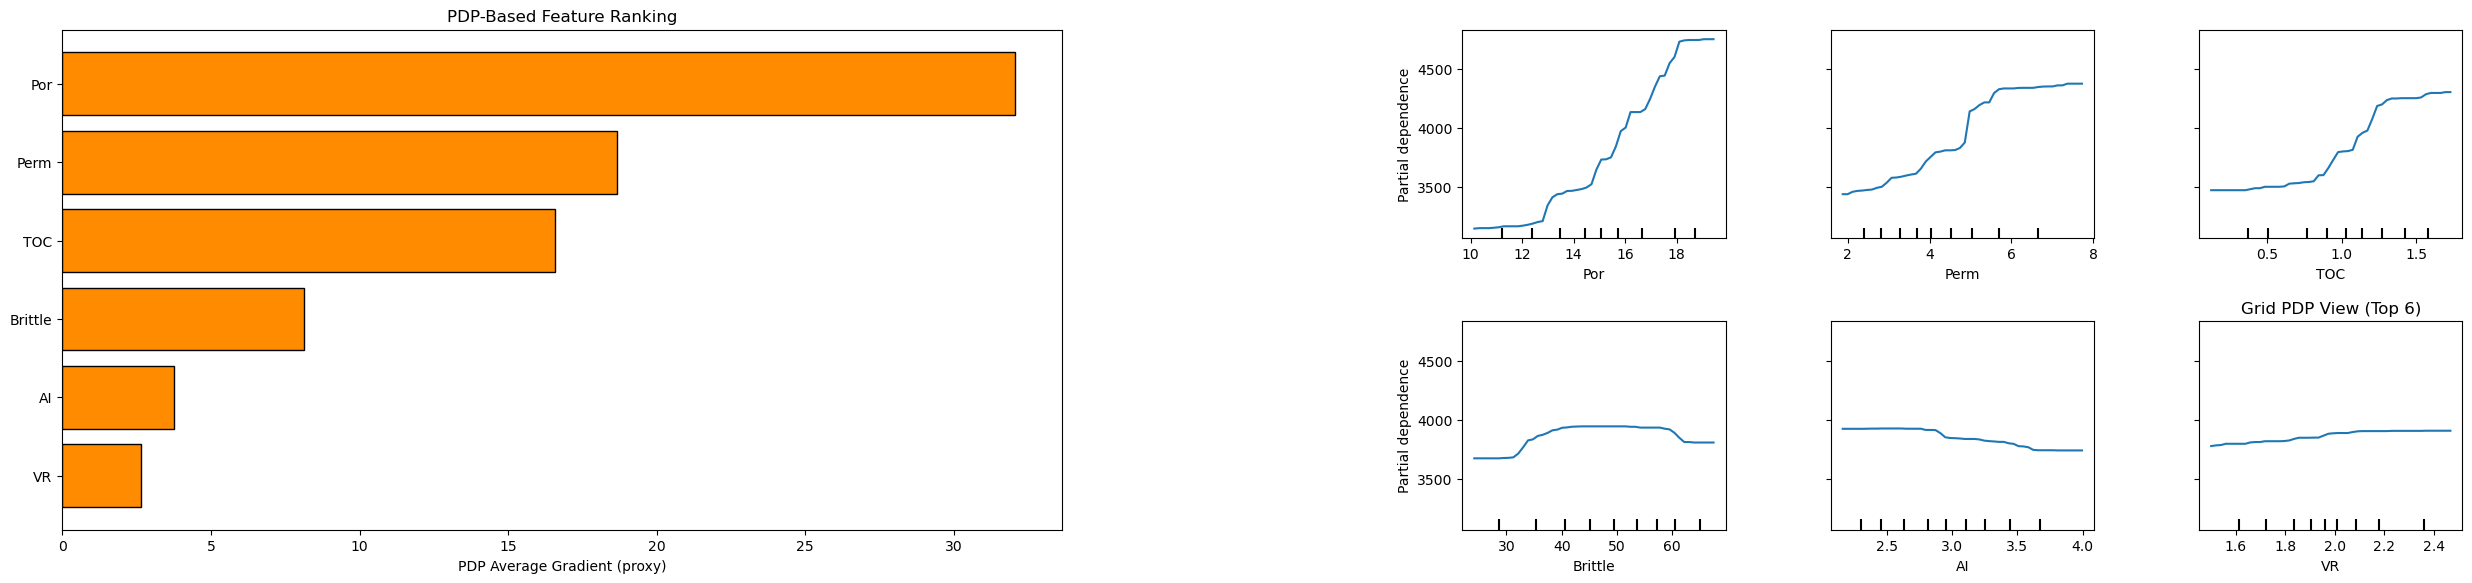

In [15]:
plt.figure(figsize=(12, 5))

# Bar-style PDP ranking: compute average gradient as a proxy for feature importance
pdp_means = []
for feature in pred:
    pd_result = partial_dependence(rfr, X=x, features=[feature], grid_resolution=50)
    values = pd_result["average"][0]
    pdp_means.append(np.mean(np.abs(np.gradient(values))))

sorted_idx = np.argsort(pdp_means)[::-1]
top_features = [pred[i] for i in sorted_idx]
top_scores = [pdp_means[i] for i in sorted_idx]

# Subplot 1: Horizontal bar plot 
plt.subplot(1, 2, 1)
plt.barh(top_features, top_scores, color='darkorange', edgecolor='black')
plt.xlabel('PDP Average Gradient (proxy)')
plt.title('PDP-Based Feature Ranking')
plt.gca().invert_yaxis()  # highest rank at top

# Subplot 2: Grid PDP plots using built-in display
plt.subplot(1, 2, 2)
features_2d = [[pred[i]] for i in sorted_idx[:6]]
PartialDependenceDisplay.from_estimator(
    rfr, x, features_2d, grid_resolution=50, ax=plt.gca()
)
plt.title('Grid PDP View (Top 6)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.4, hspace=0.4)
plt.show()


The feature ranking from the PDP analysis is consistent with the SHAP values and previous feature ranking methods, confirming the importance of key predictors like Porosity, Permeability, and TOC.

However, to estimate global importance using PDPs, each feature must be analyzed independently, which means **interactions between features are not captured**.

Additionally, the curse of dimensionality becomes clear here, analyzing `m` features requires creating m + 1` plots, which can be time consuming and harder to interpret as the number of predictors increases.


### Computational Perspective of PDPs and Its Challenges 

Partial Dependence Plots (PDPs) offer a computationally efficient approach for visualizing feature effects in machine learning models. They are especially appealing because of their straightforward, model-agnostic computation only requiring average predictions over modified datasets, making them intuitive and easy to implement. This simplicity allows for fast global insight, especially in low-dimensional settings (Friedman, 2001; Kerrigan et al., 2025).

However, PDPs struggle to capture **local Importance**. As noted by Kerrigan et al. (2025), they only present the *average* effect of a feature, which can hide different behaviors across dataset, especially when interactions exist. This averaging process also **limits their ability to reveal localized effects**, making them less informative in complex or highly interactive models.

To address this limitation, **Individual Conditional Expectation (ICE)** plots are used. ICE plots display the prediction curves for individual data points, rather than just the average, which helps visualize local variations and interaction effects more clearly. A simple code example is shown below to generate ICE curves using `PartialDependenceDisplay`.

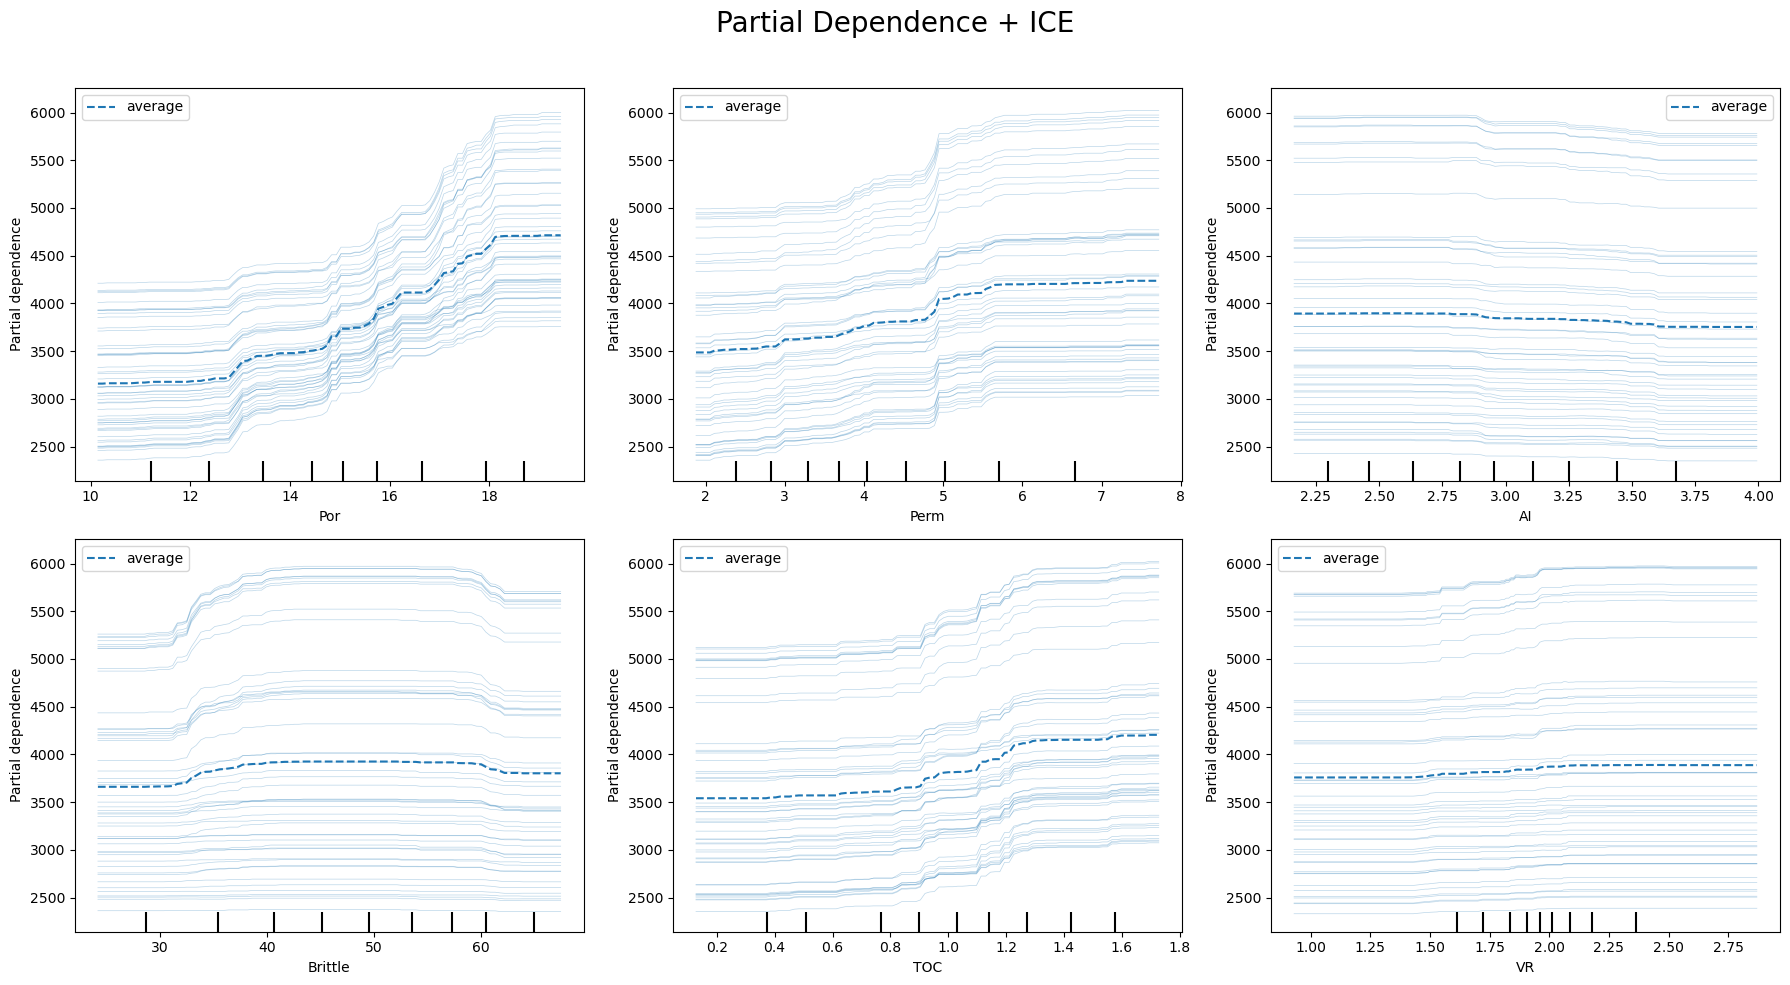

In [16]:
# Select features (by index or column name) — 1D only
features_1d = [0, 1, 2, 3, 4, 5]

# Plot PDP + ICE
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
ax = ax.flatten()

PartialDependenceDisplay.from_estimator(
    rfr,
    x,
    features=features_1d,
    kind='both',  # <-- This is the key: 'both' = PDP + ICE
    grid_resolution=100,
    ax=ax,
    subsample=50,  # optional: limits number of ICE lines
    random_state=0
)

fig.suptitle('Partial Dependence + ICE', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 4- Compare Between PDPs and SHAP Values & Conclusion 

After completing the bivariate analysis and feature ranking, we compared **SHAP values** and **PDPs** to understand their strengths, limitations, and alignment with the baseline analysis.

### Similarities

- Both methods identified **Porosity, Permeability, and TOC** as the most important predictor features, which aligns with earlier statistical analyses.
- Both methods are useful for **global feature importance ranking** and provided consistent top features across models.

### Differences

| Aspect                     | SHAP Values                                          | PDPs                                                  |
|---------------------------|------------------------------------------------------|--------------------------------------------------------|
| **Interpretation Scope**  | Global & Local                                       | Global only (average behavior)                         |
| **Feature Interactions**  | Captures them through Shapley values               | Does not capture interactions (assumes independence) |
| **Local Behavior**        | Explains individual predictions                    | Cannot show instance-level variation                 |
| **Computation**           | More expensive (approximated using sampling)         | Faster and simpler                                     |
| **Visualization**         | Summary plots, force plots, violin, waterfall        | Line plots, bar plots, and ICE (for individual curves) |
| **Dimensionality Impact** | Scales better, handled through sampling              | Requires `m + 1` plots for `m` features (curse of dimensionality) |


### Key Observations

- SHAP values offered **more informative and nuanced explanations**, especially for detecting feature interactions and understanding how features contribute differently across samples.
- PDPs provided a **simpler and computationally cheaper** overview but lacked the granularity needed for full interpretability in complex models.
- The **curse of dimensionality** was more noticeable in PDPs, where a separate plot was required for each feature.

This comparison highlights how SHAP and PDPs complement each other. While SHAP is better suited for **local and interaction-aware explanations**, PDPs are useful for **quick, global overviews** and are more interpretable for linear or low-complexity models.

## References

- Friedman, J.H. (2001). *Greedy Function Approximation: A Gradient Boosting Machine*. *Annals of Statistics*, 29(5), 1189–1232. https://doi.org/10.1214/aos/1013203451  
- Goldstein, A., Kapelner, A., Bleich, J., & Pitkin, E. (2015). *Peeking Inside the Black Box: Visualizing Statistical Learning With Plots of Individual Conditional Expectation*. *Journal of Computational and Graphical Statistics*, 24(1), 44–65. https://doi.org/10.1080/10618600.2014.907095  
- Kerrigan, E., Gawehn, T., Luo, L., & Wagener, T. (2025). *PDPilot: Exploring Partial Dependence Plots Through Ranking, Filtering, and Clustering*. arXiv preprint arXiv:2401.11409. https://arxiv.org/abs/2401.11409  
- Pyrcz, M.J. (2024). *Feature Ranking — Applied Machine Learning in Python*.GitHub Repository. Zenodo. https://doi.org/10.5281/zenodo.15169138
- Pyrcz, M.J. (2021). *GeoDataSets: Synthetic Subsurface Data Repository (0.0.1)*. Zenodo. https://doi.org/10.5281/zenodo.5564874


#### About the Supervising Professor

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)